# 吴恩达作业
## 向正中 20/9/26 python 3.8

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# 读取文件
dataPath = 'ex1data1.txt'
data = pd.read_csv(dataPath,header=None,names=['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


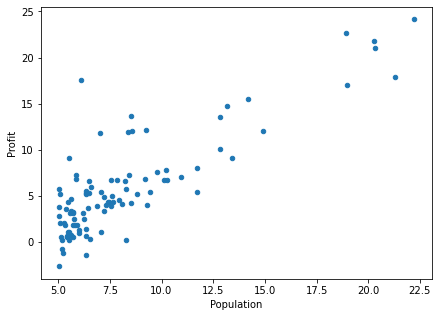

In [11]:
data.plot(kind='scatter',x='Population',y='Profit',figsize=(7,5))
plt.show()

In [12]:
# 进行数据预处理，将x_0=1
data.insert(loc=0,column='X_0',value=1)
data.head()

,X_0,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [13]:
cols = data.shape[1]
# 切片获取向量
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]




## 计算线性回归的代价函数
X为m\*n阶向量，y为m\*1阶向量，$\theta$为1*n阶向量
m为数据集的数据数， n为变量数


In [14]:

def computeCostFunction_LinearRegression(X,y,theta):
    expInner = np.power(X @ theta.T-y,2)
    return (np.sum(expInner)/(2*len(X)))

### 将数据转化为numpy的形式进行处理


In [15]:
X = np.array(X)
y = np.array(y)
# theta = np.array([0,0]) # 错误写法，因为我们计算的是一个m*n的矩阵，这种写法是一个单数组
theta = np.array([[0,0]])

### 计算初始的代价函数值


In [17]:
computeCostFunction_LinearRegression(X=X,y=y,theta=theta)


32.072733877455676

## Gradient Descent

In [18]:
def gradientDescent_Function_1(X,y,theta,alpha,epoch):
    cost = np.zeros(epoch)
    m = X.shape[0] # number of data
    for i in  range(epoch):
        exp1 = ((X @ theta.T) - y).T @ X
        theta = theta - (alpha/m)*exp1 # 向量法，一次性更新所有theta
        cost[i]=computeCostFunction_LinearRegression(X,y,theta)
    return theta,cost

In [19]:
alpha = 0.01
epoch = 1000
final_theta, cost = gradientDescent_Function_1(X,y,theta,alpha,epoch)

绘制线性模型以及数据，查看其拟合情况
np.linspace()在指定的间隔内返回均匀间隔的数字

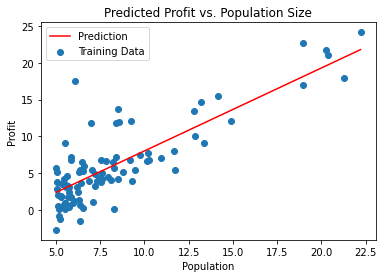

In [20]:
x = np.linspace(data.Population.min(),data.Population.max(),100) # row

f = final_theta[0,0] + final_theta[0,1]*x # col
# plt.subplots()返回一个包含figure和axes对象的元组
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data['Population'],data.Profit,label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

绘制代价函数值的变化



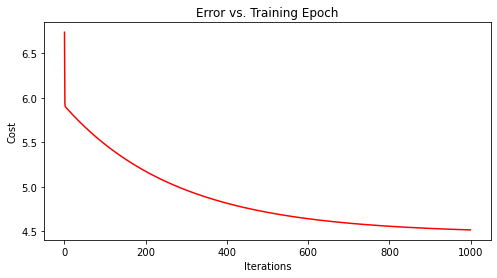

In [21]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(np.arange(epoch), cost, 'r')  # np.arange()返回等差数组
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [ ]:
def normalFunction():

